<a href="https://colab.research.google.com/github/binathperera/deep-learning-letter-classification/blob/main/Sinhala_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [4]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')
X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [5]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)


Shape of X_train:  (80, 67500)
Shape of Y_train:  (80,)
Shape of X_test:  (20, 67500)
Shape of Y_test:  (20,)


In [6]:
X_train = X_train.reshape(len(X_train), 150, 150, 3)
Y_train = Y_train.reshape(len(Y_train), 1)
X_test = X_test.reshape(len(X_test), 150, 150, 3)
Y_test = Y_test.reshape(len(Y_test), 1)
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)


Shape of X_train:  (80, 150, 150, 3)
Shape of Y_train:  (80, 1)
Shape of X_test:  (20, 150, 150, 3)
Shape of Y_test:  (20, 1)


In [11]:
X_train = X_train/255.0
X_test = X_test/255.0


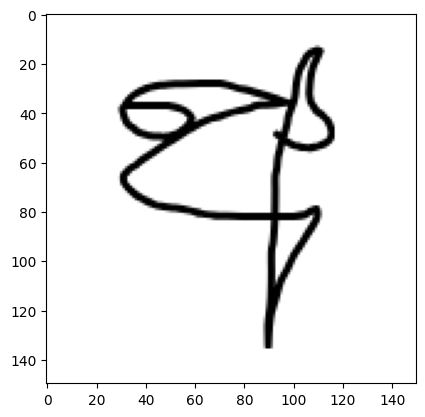

In [12]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()


In [13]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)),
    MaxPooling2D((2,2)),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    #Dense(no of neurons, activation)
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [14]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [15]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
2/2 [==============================] - 3s 372ms/step - loss: 1.2190 - accuracy: 0.5625
Epoch 2/5
2/2 [==============================] - 2s 351ms/step - loss: 0.5970 - accuracy: 0.5000
Epoch 3/5
2/2 [==============================] - 2s 391ms/step - loss: 0.7798 - accuracy: 0.5250
Epoch 4/5
2/2 [==============================] - 2s 353ms/step - loss: 0.3412 - accuracy: 0.9875
Epoch 5/5
2/2 [==============================] - 2s 571ms/step - loss: 0.1434 - accuracy: 1.0000


In [16]:
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 297ms/step - loss: 0.1098 - accuracy: 1.0000


[0.1098116859793663, 1.0]

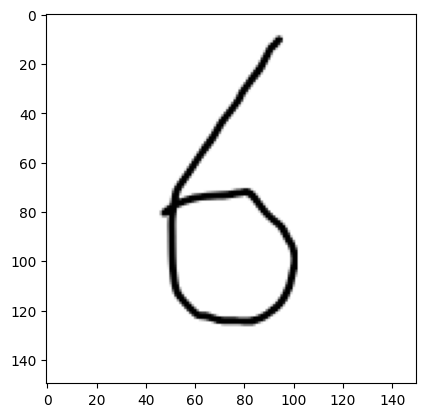

1/1 [==============================] - 0s 27ms/step
Our model says it is : ර


In [28]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()
y_pred = model.predict(X_test[idx2, :].reshape(1, 150, 150, 3))
y_pred = y_pred > 0.5
#print(y_pred)
if(y_pred != 0):
   pred = 'අ'
else:
   pred = 'ර'
print("Our model says it is :", pred)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')